# Fourier Series

Fourier series are a method we can use to solve inhomogeneous 2nd-order ODEs of the form
\begin{equation}
y^{\prime\prime} + p(t) y^{\prime} + q(t) y = r(t) \;,
\end{equation}
where the forcing function $r(t)$ is periodic. This means looking like one of these examples:

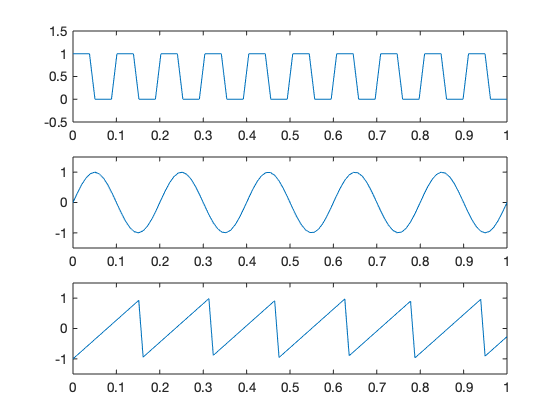

In [22]:
% periodic square wave
subplot(3,1,1);
squareWave = repmat([1,1,1,1,0,0,0,0], [1, 10]);
t = linspace(0, 1, length(squareWave));
plot(t, squareWave); ylim([-0.5, 1.5]);

% sin wave
subplot(3,1,2);
t = linspace(0, 1, 100);
plot(t, sin(t*10*pi)); ylim([-1.5, 1.5]);

% sawtooth
subplot(3,1,3);
t = linspace(0, 1, 100);
y = ((mod(t,2*pi/40)/(pi*2/40))*2)-1;
plot(t, y); ylim([-1.5, 1.5]);

(Actually, as we'll see later, we can use a Fourier series to represent generic forcing function!)

Fourier series have been around a while, ever since in 1790 Jean-Baptiste Joseph Fourier found that generic periodic functions could be represented by a sum of series of `sin()` and `cos()` functions, harmonically related by frequency.

In general, a Fourier series represents a function $f(t)$ by
\begin{equation}
f(t) = a_0 + \sum_{n=1}^{\infty} a_n \cos (n \omega t) + \sum_{n=1}^{\infty} b_n \sin (n \omega t)
\end{equation}
where $a_0$, $a_n$, and $b_n$ are the Fourier coefficients, $\omega = \frac{2\pi}{T}$ is the frequency of the function $f(t)$, and $T$ is the period. $n$ is an integer used as an index.

## Properties of Fourier Series

Considering that $n$ is an integer, and the sine and cosine components of a Fourier series share the same fundamental frequency $\omega$, Fourier series have some useful properties:

1. The integral of each component trigonometric function over the period is zero:
\begin{equation}
\int_0^T \sin (n \omega t) dt = 0 = \int_0^T cos (n \omega t) dt
\end{equation}

2. The component trigonometric functions are **orthogonal** over their period:
\begin{equation}
\int_0^T \cos(n \omega t) \sin (m \omega t) dt = 0
\end{equation}
for all values of $n, m = 1, 2, \ldots, \infty$.

3. The component trigonometric functions are also orthogonal with themselves over their period:
\begin{align}
\int_0^T \cos (n \omega t) \cos (m \omega t) dt &= \begin{cases}0 \quad m \neq n \\ \frac{T}{2} \quad m = n \end{cases} \\
%
\int_0^T \sin (n \omega t) \sin (m \omega t) dt &= \begin{cases}0 \quad m \neq n \\ \frac{T}{2} \quad m = n \end{cases}
\end{align}
for all values of $n, m = 1, 2, \ldots, \infty$.

## Fourier coefficients

We can use the above properties to calculate the Fourier coefficients, given a periodic function $f(t)$.
First, recall
\begin{equation}
f(t) = a_0 + \sum_{n=1}^{\infty} a_n \cos (n \omega t) + \sum_{n=1}^{\infty} b_n \sin (n \omega t)
\end{equation}

1. To calculate $a_0$, integrate both sides of the equation over the period:
\begin{equation}
\int_0^T f(t) dt = \int_0^T a_0 dt + \int_0^T \left( \sum_{n=1}^{\infty} a_n \cos (n \omega t) \right)dt + \int_0^T \left( \sum_{n=1}^{\infty} b_n \sin (n \omega t) \right) dt
\end{equation}
For the integrals of the infinite sums, recall that the integral of the sum of some functions is the same as the sum of the integrals of the functions: $\int (a + b + c) = \int a + \int b + \int c$. That means that 
\begin{align}
\int_0^T \left( \sum_{n=1}^{\infty} a_n \cos (n \omega t) \right)dt = \int_0^T a_1 \cos (\omega t) dt + \int_0^T a_2 \cos (2 \omega t) dt + \ldots &= 0 \;, \text{ and} \\
\int_0^T \left( \sum_{n=1}^{\infty} b_n \sin (n \omega t) \right)dt = \int_0^T b_1 \sin (\omega t) dt + \int_0^T b_2 \sin (2 \omega t) dt + \ldots &= 0 \;,
\end{align}
since the integrals of the trigonometric functions are all zero over the period. Thus,
\begin{equation}
a_0 = \frac{1}{T} \int_0^T f(t) dt
\end{equation}

2. To calculate $a_n$, multiply both sides of the equation by $\cos(m \omega t)$ and integrate over the period:
\begin{equation}
\int_0^T f(t) \cos(m \omega t) dt = a_0 \int_0^T \cos(m \omega t) dt + \int_0^T \left( \sum_{n=1}^{\infty} a_n \cos (n \omega t) \cos(m \omega t) \right)dt + \int_0^T \left( \sum_{n=1}^{\infty} b_n \sin (n \omega t) \cos(m \omega t) \right) dt
\end{equation}
Let's take a look at each of the three integrals on the right-hand side. First,
\begin{equation}
a_0 \int_0^T \cos(m \omega t) dt = 0
\end{equation}
because it just integrates cosine over the period.
Skipping to the last term,
\begin{equation}
\int_0^T \left( \sum_{n=1}^{\infty} b_n \sin (n \omega t) \cos(m \omega t) \right) dt = b_1 \int_0^T sin(\omega t) \cos (m \omega t) dt + b_2 \int_0^T \sin (2 \omega t) \cos (m \omega t) dt + \ldots = 0
\end{equation}
due to orthogonality. We are just left with the middle integral; let's expand a few terms to see what that looks like:
\begin{equation}
\int_0^T \left( \sum_{n=1}^{\infty} a_n \cos (n \omega t) \cos(m \omega t) \right)dt = a_1 \int_0^T \cos (\omega t) \cos (m \omega t) dt + a_2 \int_0^T \cos (2 \omega t) \cos (m \omega t) dt + \ldots
\end{equation}
Again, due to orthogonality, all of the terms of this infinite sum of integrals will be zero, *except* for the term where $n = m$. As a result, we are left with
\begin{align}
\int_0^T f(t) \cos(m \omega t) dt &= \int_0^T a_m \cos^2 (m \omega t) dt = a_m \frac{T}{2} \\
a_n = a_m &= \frac{2}{T} \int_0^T f(t) \cos (n \omega t) dt
\end{align}

3. We can find $b_n$ in the same way, multiplying the equation by $\sin (m \omega t)$ and integrating over the period. The work is the same, so let's skip that:
\begin{equation}
b_n = \frac{2}{T} \int_0^T f(t) \sin (n \omega t) dt
\end{equation}

## Example: periodic rectangular wave

Let's find the Fourier series for representing this periodic function $f(t)$:

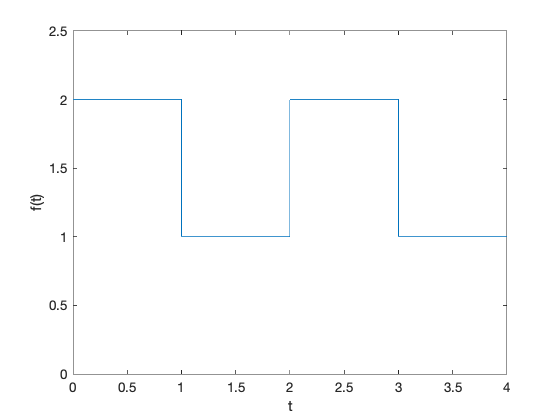

In [6]:
x = [0 1 1 2 2 3 3 4]; y = [2 2 1 1 2 2 1 1];
plot(x,y); ylim([0 2.5]); ylabel('f(t)'); xlabel('t')

First, we need to identify the fundamental period and frequency: $T = 2$ and then $\omega = \frac{2\pi}{T} = \pi$. Our work is then to calculate the Fourier coefficients. Since our periodic function $f(t)$ is not easily expressed with a function–hence the need for a Fourier series—we'll use piecewise integration.

First, calculate $a_0$:
\begin{align}
a_0 =& \frac{1}{T} \int_0^T f(t) dt \\
&= \frac{1}{2} \int_0^2 f(t) dt = \frac{1}{2}\left( \int_0^1 2dt + \int_1^2 1dt \right) = \frac{1}{2} (2\times 1 + 1 \times 1) \\
a_0 &= \frac{3}{2}
\end{align}

Then, get $a_n$:
\begin{align}
a_n &= \frac{2}{T} \int_0^T f(t) \cos (n \omega t) dt \\
&= \frac{2}{2} \int_0^2 f(t) \cos (n \pi t) dt = \left( \int_0^1 2 \cos (n \pi t) dt + \int_1^2 1 \cos (n \pi t)dt \right) \\
&= \frac{2}{n \pi} \sin(n \pi t)\Big|_0^1 + \frac{1}{n\pi} \sin(n \pi t)\Big|_1^2 \\
&= \frac{2}{n \pi}\left(\sin(n\pi) - \sin(0)\right) + \frac{1}{n\pi}\left( sin(2n\pi) - \sin(n\pi)\right) \\
a_n &= 0
\end{align}

Finally, we can calculate $b_n$:
\begin{align}
b_n &= \frac{2}{T} \int_0^T f(t) \sin (n \omega t) dt \\
&= \frac{2}{2} \int_0^2 f(t) \sin (n \pi t) dt = \left( \int_0^1 2 \sin (n \pi t) dt + \int_1^2 1 \sin (n \pi t)dt \right) \\
&= -\frac{2}{n \pi} \cos(n \pi t)\Big|_0^1 - \frac{1}{n\pi} \cos(n \pi t)\Big|_1^2 \\
&= -\frac{2}{n \pi}\left(\cos(n\pi) - \cos(0)\right) - \frac{1}{n\pi}\left( cos(2n\pi) - \cos(n\pi)\right) \\
b_n &= -\frac{2}{n \pi}\left(\cos(n\pi) - 1\right) - \frac{1}{n\pi}\left( 1 - \cos(n\pi)\right) = -\frac{1}{n\pi}\left( \cos(n\pi) - 1\right)
\end{align}
but recall that $n = 1, 2, \ldots, \infty$. Then,
\begin{align}
b_n &= -\frac{1}{n\pi} \times \begin{cases} -2 \text{ if } n \text{ odd} \\0 \text{ if } n \text{ even}\end{cases} \\
\rightarrow b_n &= \frac{2}{n\pi} \quad n = \text{odd}
\end{align}

Then, our Fourier series representation for the function shown above is
\begin{equation}
f(t) = \frac{3}{2} + \sum_{\substack{n = 1 \\n = \text{odd}}}^{\infty} \frac{2}{n\pi} \sin (n \pi t)
\end{equation}

Now, let's see how whether this actually works! Let's start with one term of the infinite sum, then gradually increase.

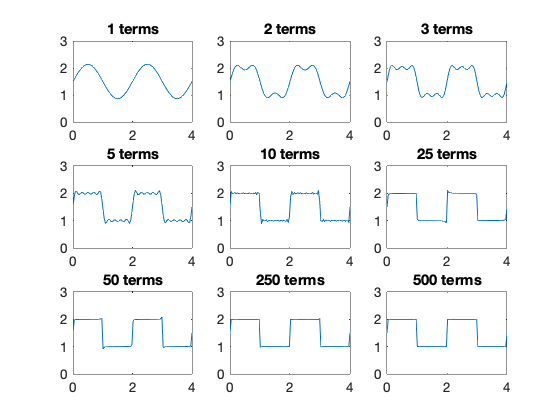

In [18]:
t = linspace(0, 4);

% maximum number of terms
n_max = [1, 2, 3, 5, 10, 25, 50, 250, 500];

for i = 1 : length(n_max)
    N = n_max(i);

    s = 3./2.;
    for n = 1 : 2 : 2*N
        s = s + (2. / (n*pi)) .* sin(n * pi * t);
    end
    subplot(3, 3, i)
    plot(t, s); axis([0 4 0 3]); title(sprintf('%d terms', N));
end

As we increase the number of terms, adding higher-frequency sine waves, we are better able to match the original rectangular wave. Notice the discrepancies that remain near the sharp corners even after the rest of the series closely resembles the function: these are known as **Gibbs phenomena**, caused by the Fourier series overshooting or undershooting (or "ringing") near discontinuities.

## Even and Odd Functions

We can simplify our work generating a Fourier series if we can identify the given periodic function $f(t)$ as an **even function** or an **odd function**.

Even functions are those where $f(-x) = f(x)$.

Odd functions are those where $f(-x) = -f(x)$.

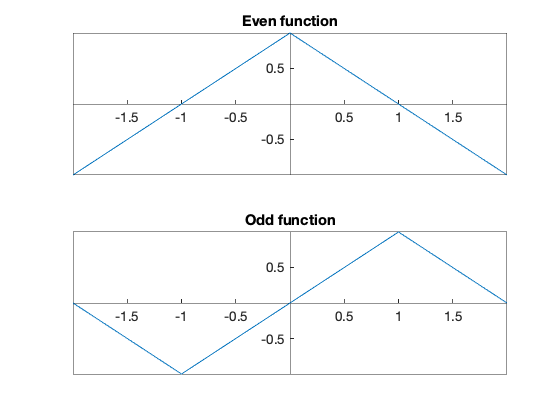

In [23]:
y = [-1 0 1 0 -1];
x = [-2 -1 0 1 2];
subplot(2,1,1); plot(x,y); title('Even function');
ax = gca; ax.XAxisLocation = 'origin'; ax.YAxisLocation = 'origin';

y = [0 -1 0 1 0];
subplot(2,1,2); plot(x,y); title('Odd function');
ax = gca; ax.XAxisLocation = 'origin'; ax.YAxisLocation = 'origin';

An even function's Fourier series simplifies to a Fourier cosine series:
\begin{align}
f(x) &= a_0 + \sum_{n=1}^{\infty} a_n \cos (n \omega x) dx \\
a_0 &= \frac{2}{T} \int_0^{T/2} f(x) dx \\
a_n &= \frac{4}{T} \int_0^{T/2} f(x) \cos(n \omega x) dx
\end{align}

An odd function's Fourier series simplifies to a Fourier sine series:
\begin{align}
f(x) &= \sum_{n=1}^{\infty} b_n \sin (n \omega x) dx \\
b_n &= \frac{4}{T} \int_0^{T/2} f(x) \sin(n \omega x) dx
\end{align}

Note: not all periodic functions can be considered an even or an odd function.

## Application: Inhomogeneous 2nd-order ODE

One way we might use a Fourier series is to solve an inhomogeneous 2nd-order ODE, where the forcing term is given by a periodic function not easily expressed using our typical functions.

### Undamped mass-spring system

For example, let's consider an undamped mass-spring system, where the forcing is given by a periodic rectangular wave:
\begin{equation}
y^{\prime\prime} + 4y = f(t)
\end{equation}
where the forcing function $f(t)$ is

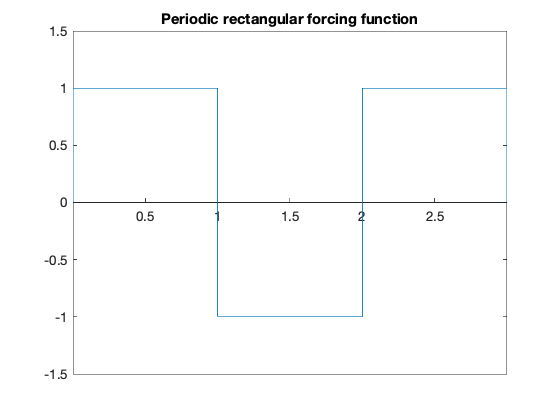

In [39]:
t = [0 0 1 1 2 2 3 3];
y = [0 1 1 -1 -1 1 1 0];
plot(t,y); ylim([-1.5 1.5]);
title('Periodic rectangular forcing function');
ax = gca; ax.XAxisLocation = 'origin';

Using recognizing this as an odd function, we could construct a Fourier sine series to represent the forcing function:
\begin{equation}
f(t) = \sum_{\substack{n=1\\n=\text{odd}}}^{\infty} \frac{4}{n\pi} \sin(n \pi t)
\end{equation}

Let's confirm this works:

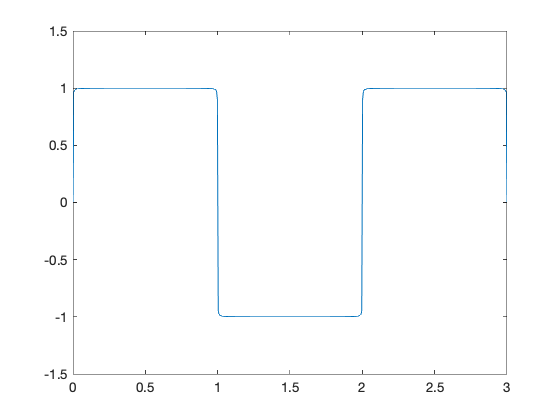

In [33]:
t = linspace(0, 3, 500);
s = 0;
for n = 1 : 2 : 1000
    s = s + (4/(n*pi)).*sin(n*pi*t);
end
plot(t, s)

Looks good!

To find the exact solution for our displacement $y(t)$, we can follow our usual analytical solution approach: find the homogeneous solution $y_H$, then find the inhomogeneous solution $y_{IH}$; the overall solution is then $y(t) = y_H + y_{IH}$. The homogeneous solution is
\begin{equation}
y_H = c_1 \sin (2t) + c_2 \cos (2t)
\end{equation}
We then find the inhomogeneous solution using
\begin{equation}
y^{\prime\prime} + 4y = \frac{4}{n\pi} \sin (n \pi t) \quad n = 1, 3, \ldots, \infty
\end{equation}
Solving this will give us a specific $y_{IH, n}$; the complete inhomogeneous solution is then
\begin{equation}
y_{IH} = \sum_{\substack{n=1\\n=\text{odd}}}^{\infty} y_{IH, n} \;.
\end{equation}

Recognizing that our forcing function is sinusoidal, we should use the method of undetermined coefficients:
\begin{equation}
y_{IH, n} = K_1 \sin (n \pi t) + K_2 \cos (n \pi t)
\end{equation}
Inserting this into the above ODE gives
\begin{align}
K_1 &= \frac{4}{n \pi (4 - n^2 \pi^2)} \\
K_2 &= 0
\end{align}

Thus, the overall solution is
\begin{equation}
y(t) = c_1 \sin(2t) + c_2 \cos(2t) + \sum_{\substack{n=1\\n=\text{odd}}}^{\infty} \frac{4}{n \pi (4 - n^2 \pi^2)} \sin (n \pi t)
\end{equation}

### Damped mass-spring system

What about a damped mass-spring system? Recall that the homogeneous solution could take one of these three forms:
\begin{align}
y_H &= c_1 e^{-\lambda_1 t} + c_2 e^{-\lambda_2 t} \\
y_H &= c_1 e^{-\lambda_1 t} + c_2 t e^{-\lambda_2 t} \text{ or} \\
y_H &= e^{-\alpha t} (c_1 \sin(\beta t) + c_2 \cos(\beta t))
\end{align}
while the inhomogeneous solution, given a Fourier series forcing function, will take the form
\begin{equation}
y_{IH} = K_1 \sin() + K_2 \cos()
\end{equation}

The overall solution combines the homogenenous and inhomogeneous solutions. But, the homogeneous solution in this case is **transient**, because it decays to zero. On the other hand, the inhomogeneous solution remains, and is the **steady-state solution**.